In [86]:
# Spatial trigger waves: positive feedback gets you a long way, Gelens et al MBoC 2014

from numpy import * # basic package to do computation
import pylab as plt # package to plot
from sympy.solvers import solve # package for symbolic computations (use of unassigned variables)
from sympy import Symbol 
from sympy.matrices import *
from matplotlib.colors import cnames # colors for plots
import random # random numbers
from scipy.integrate import odeint # ode solver 



In [114]:
D=1
a=.1
epsilon=.01
b=1  # oscillatory (b=1.5 excitable  - b=2 bistable)

In [115]:
# Definition of system but with an array instead of a matrix for practical purposes 
def dX_dta(X):
    """ Return the derivative of x and v (encoded in X: Fitzhugh-Nagumo) """
    return array([ X[0]-X[0]**3-X[1], epsilon*(X[0]-b*X[1]+a) ])

def calc_deri(yvec, time,a,b):
     return (yvec[0]-yvec[0]**3-yvec[1], epsilon*(yvec[0] - b*yvec[1]+a) )

In [116]:
ymax=2
xmax=1.5
nb_points   = 50                      

x = linspace(-xmax, xmax, nb_points)
y = linspace(-ymax, ymax, nb_points)

In [117]:
X1 , Y1  = meshgrid(x, y)  
DX1, DY1 = dX_dta([X1, Y1])   

In [118]:
x[len(x)-1]
dX_dta([x[len(x)-1],0])

array([-1.875,  0.016])

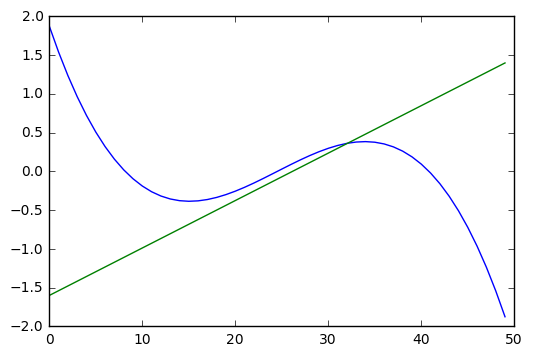

In [119]:
plt.plot((x-(x)**3))
plt.plot((x-a)/b)
plt.show()

In [120]:
tmax = 1000
number_of_time_steps= 50000
time_vec = linspace(0, tmax, number_of_time_steps)

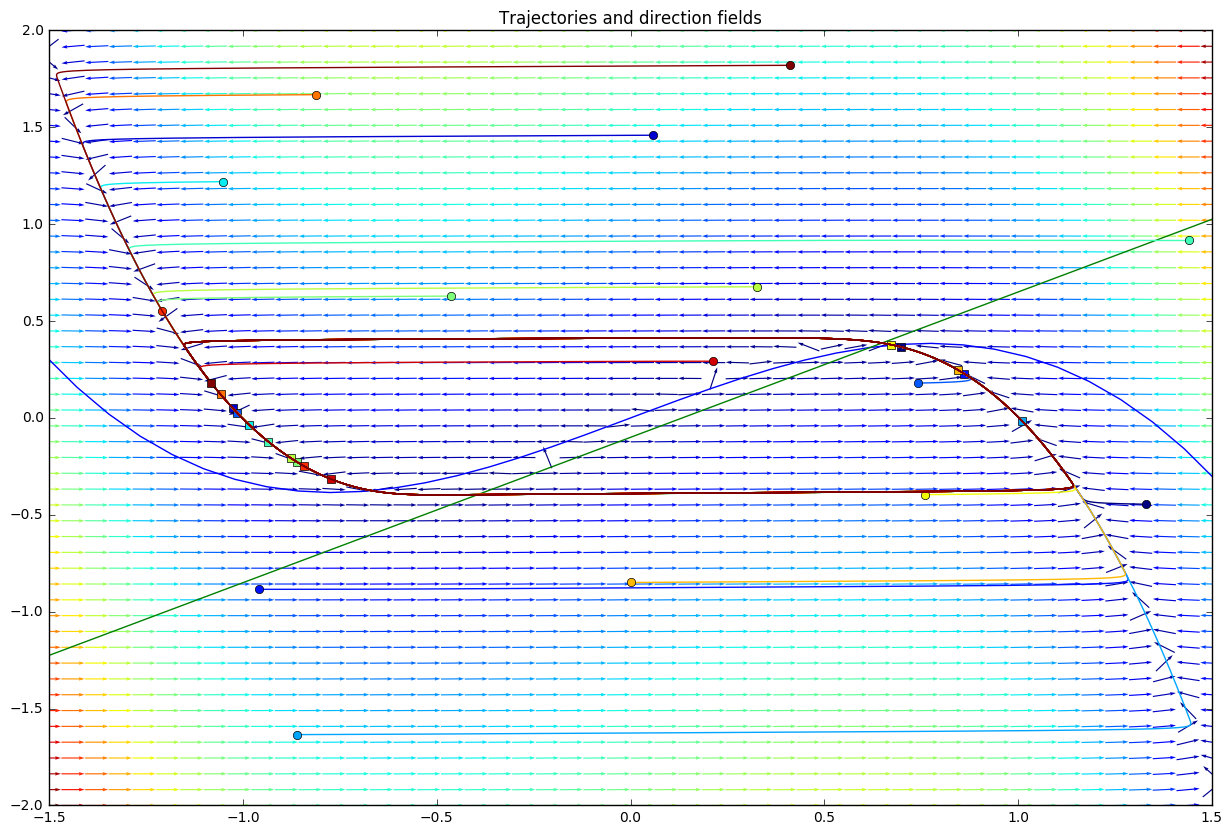

In [121]:
#-------------------------------------------------------
# !!! here we need the system encoded in an array !! 
# define a grid and compute direction at each point
#ymax = p.ylim(ymin=0)[1]                        # get axis limits
#xmax = p.xlim(xmin=0)[1] 


X1 , Y1  = meshgrid(x, y)                       # create a grid
                   # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
                               

                               
DX1 /= M                                        # Normalize each arrows (otherwise arrow near the center are too small)
DY1 /= M   
#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
fig = plt.figure(figsize=(15, 10), dpi=100)
plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', scale=50,width=0.001,cmap=plt.cm.jet)
#plt.legend()
# plt.grid()
plt.xlim(-xmax, xmax)
plt.ylim(-ymax, ymax)
plt.plot(y,x-x**3)
plt.plot(y,(x-a)/b)

N_trajectories=15  #number of trajectories plotted on top of the velocity field
colors = plt.cm.jet(linspace(0, 1, N_trajectories))
i=0
for y0 in range(N_trajectories):
        yinit = ( -xmax+random.random()*(2*xmax), -ymax+random.random()*(2*ymax) )
        yarr = odeint(calc_deri, yinit, time_vec, args=(a,b))
        plt.plot(yarr[:, 0], yarr[:, 1], label='traject',color=colors[i])
        plt.plot([yarr[0,0]], [yarr[0,1]], 'o',color=colors[i]) # start
        plt.plot([yarr[-1,0]], [yarr[-1,1]], 's',color=colors[i]) # end
        i=i+1
plt.show()
# 